In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Generate Data

In [2]:
x_train = np.linspace(-1,1,20)

In [3]:
x_train

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [4]:
y_train = np.array([-0.6561, -0.3099, -0.59035, -0.50855, -0.285,
                   -0.2443, -0.02445, 0.00135, -0.2006, 0.07475,
                   -0.1422, 0.06515, 0.15265, 0.3521, 0.28415,
                   0.5524, 0.23115, 0.20835, 0.4211, 0.60485])

In [5]:
x_test = np.linspace(-1,1,20)
x_test

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [6]:
y_test = np.array([-0.69415, -0.451, -0.43005, -0.4484, -0.1475,
                   -0.5019, -0.28055, 0.24595, -0.21425, -0.0286,
                   0.23415, 0.46575, 0.07955, 0.1973, 0.0719,
                   0.3639, 0.5536, 0.3365, 0.50705, 0.33435])

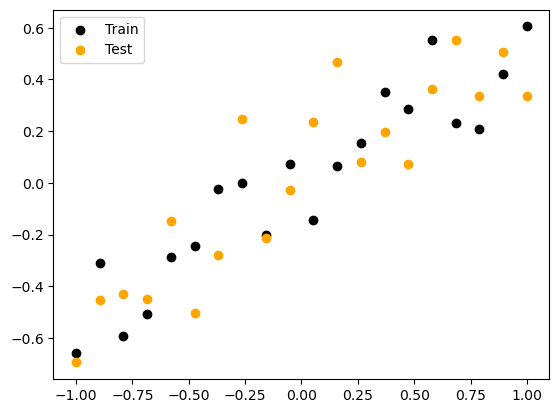

In [7]:
plt.scatter(x_train, y_train, c='black', label="Train")
plt.scatter(x_test,y_test, c='orange', label='Test')
plt.legend()
plt.show()

## Regression Model

In [8]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=1))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model.fit(x_train, y_train, epochs=500, validation_data = (x_test,y_test), verbose=True)       


Epoch 1/500
1/1 [==============================] - 1s 515ms/step - loss: 0.1081 - mse: 0.1081 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 2/500
1/1 [==============================] - 0s 31ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0485 - val_mse: 0.0485
Epoch 3/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0393 - mse: 0.0393 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 4/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 5/500
1/1 [==============================] - 0s 31ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 6/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 7/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 8/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0186 - mse: 0.0

In [9]:
# evaluate model
_,train_mse = model.evaluate(x_train, y_train, verbose=1)

1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - mse: 0.0040


In [10]:
_,test_mse = model.evaluate(x_test,y_test,verbose=1)

1/1 [==============================] - 0s 25ms/step - loss: 0.0460 - mse: 0.0460


In [11]:
print(f"Train: {train_mse}, Test: {test_mse}")

Train: 0.004021409433335066, Test: 0.04597132280468941


In [12]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 101ms/step


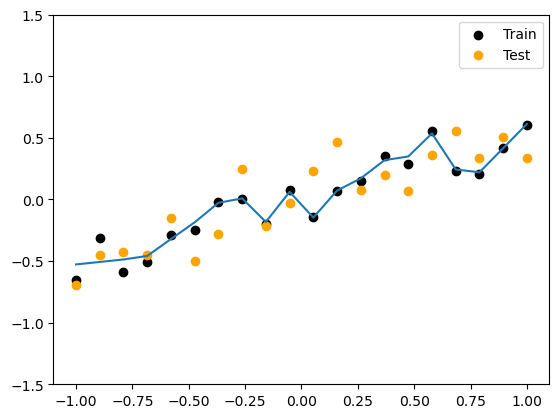

In [13]:
plt.figure()
plt.scatter(x_train, y_train, c='black', label='Train')
plt.scatter(x_test, y_test, c='orange', label='Test')
plt.plot(x_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

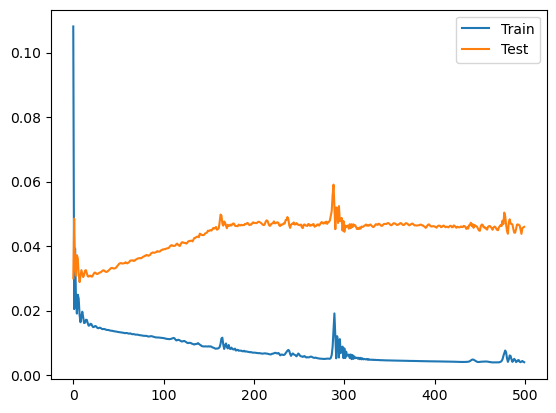

In [14]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

## Dropout model

In [22]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim = 1))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)

model.compile(loss='mse', optimizer=adam, metrics=['mse'])

history = model.fit(x_train,y_train, epochs=500, validation_data = (x_test, y_test), verbose=True)

Epoch 1/500
1/1 [==============================] - 0s 459ms/step - loss: 0.1517 - mse: 0.1517 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 2/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 3/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0506 - mse: 0.0506 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 4/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 5/500
1/1 [==============================] - 0s 31ms/step - loss: 0.0317 - mse: 0.0317 - val_loss: 0.0376 - val_mse: 0.0376
Epoch 6/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 7/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 8/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0335 - mse: 0.0

In [23]:
# evaluate model
_, train_mse = model.evaluate(x_train, y_train, verbose=True)
_, test_mse = model.evaluate(x_test, y_test, verbose=True)

1/1 [==============================] - 0s 26ms/step - loss: 0.0387 - mse: 0.0387


In [24]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 71ms/step


In [25]:
print(f"Train: {train_mse} Test: {test_mse}")

Train: 0.011086152866482735 Test: 0.038670189678668976


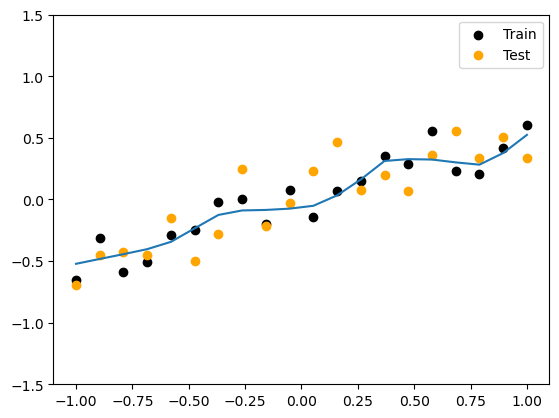

In [26]:
plt.figure()
plt.scatter(x_train, y_train, c='black', label='Train')
plt.scatter(x_test, y_test, c='orange', label='Test')
plt.plot(x_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

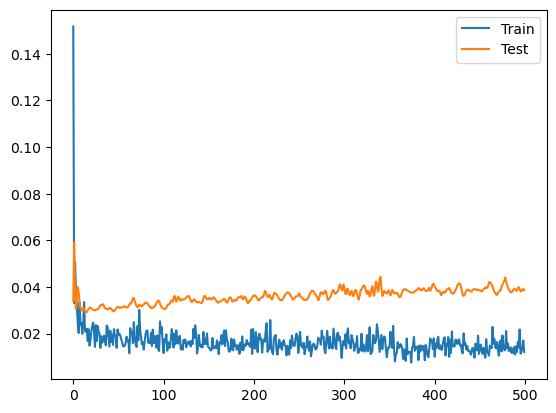

In [27]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

In [28]:
# Train: 0.016677936539053917 Test: 0.03491608053445816 for 0.5

In [ ]:
# Train: 0.011086152866482735 Test: 0.038670189678668976 for 0.2